#  Homework 3 (HW3)

Deadline: April 4th 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW3/1)

In this exercise we  predict the quality of different wines and experiment with parameter tuning! Can a winemaker predict whether his wine will be considered a good quality wine by the jury based on it's chemical properties only? 🍷 (50%)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

**a)** We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality-score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (You can import the data directly from the web page, without dowloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). Create separate *numpy arrays* to store the target variable and the rest of the attributes!  


In [2]:
# load our data
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

# separate the target variable (quality)
wine_quality = wine_df["quality"]
wine_features = wine_df.drop("quality", axis = 1)

# make the quality a binary variable
wine_quality = wine_quality.apply(lambda entry: 1 if entry >= 7 else 0)

**b)** Classification, cross validation
* Perform a classification using the kNN algorithm! Using the 10-fold cross validation technique determine for what *k* value will the classifier's F-score be optimal! (Analyze values of *k* in a reasonable interval!) <br>
Present the boxplot of the obtained F-scores (the boxplot of 10 F-scores for each *k* values) against *k*!  <br>
(Hint: use the *model_selection.cross_val_score* function and set *scoring = 'f1'*!) 
<br>
(Hint2: use the boxplot function from the *seaborn* package!)


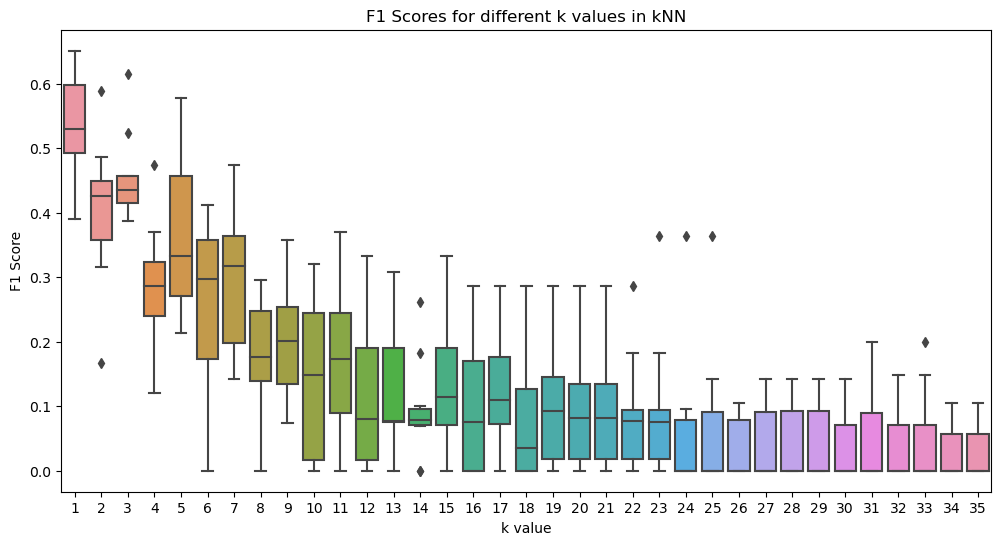

In [3]:
# using a line graph and the mean of the f1 scores for each k,
# i checked at what k the f1 scores stopped changing and it was k = 35, so.
k_values = [i for i in range(1, 36)]
kf = KFold(n_splits=10, shuffle=True, random_state=42)

f1_scores = [] 
for k in k_values:
    f1_score = cross_val_score(
                    estimator = KNeighborsClassifier(n_neighbors = k), 
                    X = wine_features, 
                    y = wine_quality, 
                    cv = kf, 
                    scoring ='f1')
    f1_scores.append(f1_score)
    
plt.figure(figsize=(12, 6))
sns.boxplot(data=f1_scores)
plt.xticks(ticks=np.arange(len(k_values)), labels=k_values)
plt.title('F1 Scores for different k values in kNN')
plt.xlabel('k value')
plt.ylabel('F1 Score')
plt.show()

In [4]:
# find the best k value
average_f1_scores = [np.mean(f1_score) for f1_score in f1_scores]
best_index = average_f1_scores.index(max(average_f1_scores))
best_k = k_values[best_index]
print(f"The best k value is {best_k} with an average F1 score of {average_f1_scores[best_index]:.2f}")

The best k value is 1 with an average F1 score of 0.54


**c)** Now solve the classification problem using a decision tree! Repeat the analysis of part b), but now, let the examined parameter be the tree's maximum depth!

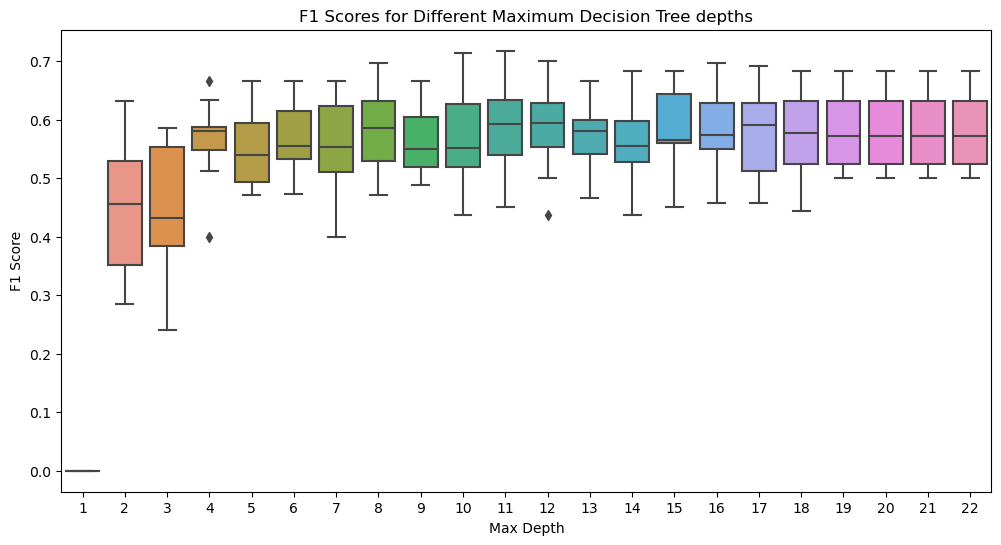

In [5]:
# using a line graph and the mean of the f1 scores for each depth,
# i checked at what depth the f1 scores stopped changing and it was depth = 22, so.
max_depth_values = [i for i in range(1, 23)]
f1_scores = []

for depth in max_depth_values:
    f1_score = cross_val_score(
                    estimator=DecisionTreeClassifier(max_depth=depth, random_state=42),
                    X=wine_features,
                    y=wine_quality,
                    cv=kf,
                    scoring='f1')
    f1_scores.append(f1_score)

plt.figure(figsize=(12, 6))
sns.boxplot(data=f1_scores)
plt.xticks(ticks=np.arange(len(max_depth_values)), labels=max_depth_values)
plt.title('F1 Scores for Different Maximum Decision Tree depths')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.show()


In [6]:
# find the best max depth
average_f1_scores = [np.mean(f1_score) for f1_score in f1_scores]
best_index = average_f1_scores.index(max(average_f1_scores))
best_max_depth = max_depth_values[best_index]
print(f"The best max depth is {best_max_depth} with an average F1 score of {average_f1_scores[best_index]:.2f}")

The best max depth is 11 with an average F1 score of 0.59


---

## Exercise 2 (HW3/2)

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. <span style="color:red">Write a one-page long (500 words) essay covering the following points!</span> (50%) If you would prefer, you can write an essay about a different data science research question of your choice.

**a)** Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 02!) 

**b)** Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!) 

**c)** What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!


---

Predicting the risk of dropping out for first year college students can be approached as a supervised binary classification problem where the target variables are does_not_drop_out and drops_out (or, 0 and 1, respectively), and the features that influence the prediction include past academic performance (SAT score), socio-economic factors (household income), engagement with support systems (on a numerical Lippert scale), field of study, student demographics (race, gender, age), e.t.c. The final feature list will be compiled in consultation with education consultants, students and college professors.
    
    
The business relevance of this project is the ability to understand the factors that contribute the most to academic failure, identify at-risk students and provide them with support. Useful data for the project will be collected from previous students, who have either dropped out or graduated, by exploiting the school’s already existing database and sending out surveys. Additionally, collaborating with other colleges with similar pedagogical culture, student demographics, and drop-out rates is a way to increase the amount of available data, and the business impact of the project.


We will go on to prepare the data by removing the incomplete, duplicate and incorrect rows we detect, and omitting columns that correlate too strongly with others. We then normalize features like SAT scores, age (min-max), and household income (logarithmic). And discretize features like fields of study and student demographics. Low-medium-high features are rewritten as numerical scores of 0, 1 and 2. Finally, we split the data into random 80:20 training-test portions.


We can then build decision tree and kNN model for classification. Classification via regression can equally be achieved with neural networks and logistic regression models, as they will provide probabilities of class membership which can be rounded up to 0 or 1. We use cross-validation to adjust model hyperparameters (maximum depth, number of neighbors, shape and size of the net…) and to assess generalization ability. Having finalized our models, we evaluate them on the test sets using metrics like accuracy, precision, recall, F1-score and ROC-AUC, to select the best one to deploy. As the years go by, and more students drop out or graduate, we re-evaluate our model and update it.
    
    
The requirements for a successful data science project are met. We consult with education experts and college professors during feature selection. We have a large, rich and official (i.e. accurate) database of former student records to pull from which is representative of the student body. Stakeholders (administrators, professors, and students) have several ways of acting on the predictions. The success of the project can also be easily determined by looking at how drop-out rates change with the introduction of initiatives inspired by the data science work.
    
    
Nevertheless, there are several ethical considerations involving privacy, legality, fairness and application with this project. We would have to ensure we use student data only under the correct provisions of the law, and with the permission of the students it was collected from. We should also carry out the process transparently with students and families being kept informed every step of the way. To protect privacy, the collected data should only be stored in anonymised form, with the school and not third parties, and for no longer than a period of five years. 
    
    
While the model can exist without the data being kept, it is also important to ensure that it is not misused, for example, in discriminating against at-risk students for access to school resources or admissions decisions. Providing support for at-risk students is a better use of the model.


---

## Works Cited:

Please cite all external resources you used to complete this assignment. If you used ChatGPT, please include a link to the conversation.

https://scikit-learn.org/stable/    
https://chat.openai.com/share/40e62b50-bdc6-489f-8473-5a3fefcaf9b4   
https://seaborn.pydata.org/